In [36]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
#from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [37]:
# Read the data from csv file
telcom=pd.read_csv('/home/sanat/Downloads/train (2).csv')
telcom.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  ...  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  \
0   0        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014   31.277   87.009    7.527        48.58       124.38         1.29         32.24         96.68          2.33           0.00            0.0            0.0           0.00            0.0           0.00              2.23              0.00              0.28              5.29             16.04              2.33              0.00              0.00              0.00              0.00              0.00              0.00          7.53         16.04          2.61             46.34            124.38              1.01             18.75             80.61               0.0              0.00               0.0               0.0               0.0               0.0               0.0  ...                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN   
1   1        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014    0.000  122.787   42.953         0.00         0.00         0.00          0.00         25.99         30.89           0.00            0.0            0.0           0.00            0.0           0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00             22.01             29.79          0.00          0.00          0.00              0.00              0.00              0.00              0.00              0.00               0.0              0.00               0.0               0.0               0.0               0.0               0.0  ...                NaN                1.0                NaN              NaN            145.0              NaN              NaN              0.0              NaN              NaN              1.0   
2   2        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014   60.806  103.176    0.000         0.53        15.93         0.00         53.99         82.05          0.00           0.00            0.0            0.0           0.00            0.0           0.00              0.53             12.98              0.00             24.11              0.00              0.00              0.00              0.00              0.00              2.14              0.00              0.00         24.64         12.98          0.00              0.00              2.94              0.00             28.94             82.05               0.0              0.00               0.0               0.0               0.0               0.0               0.0  ...                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN   

In [38]:
# Imputing null values for below column by 'NA'
for col in ('total_rech_data_6', 'total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8',
'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','av_rech_amt_data_6',
'av_rech_amt_data_7','av_rech_amt_data_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6',
'offnet_mou_7', 'offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7',
'loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6',
'loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6',
'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7',
'std_og_t2c_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7',
'spl_og_mou_8','og_others_6','og_others_7','og_others_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6',
'loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8',
'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_mou_6',
'std_ic_mou_7','std_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6',
'ic_others_7','ic_others_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'):
    telcom[col]=telcom[col].fillna('0').astype('float64')

In [39]:
# Fill null values in date column
for col in ('date_of_last_rech_6','date_of_last_rech_data_6'):
    telcom[col]=telcom[col].fillna('06/30/2014')

In [40]:
# Fill null values in date column
for col in ('date_of_last_rech_7','date_of_last_rech_data_7'):
    telcom[col]=telcom[col].fillna('07/31/2014')
for col in ('date_of_last_rech_8','date_of_last_rech_data_8'):
    telcom[col]=telcom[col].fillna('08/31/2014')


In [41]:
# Fill null values in date column
for col in ('fb_user_6','fb_user_7','fb_user_8'):
    telcom[col]=telcom[col].fillna('-1')

In [42]:
# Fill null values in date column
telcom['last_date_of_month_7']=telcom['last_date_of_month_7'].fillna('7/31/2014')
telcom['last_date_of_month_8']=telcom['last_date_of_month_8'].fillna('8/31/2014')

In [43]:
# Dropping below columns 
telcom = telcom.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis='columns')

In [44]:
# Checking for null values
null=telcom.isnull().sum()*100/telcom.shape[0]
null1=null[null!=0]
null1

Series([], dtype: float64)

In [45]:
# Average Data pack recharged
telcom['avg_rech_data_amt']=((telcom['count_rech_2g_6']+telcom['count_rech_3g_6'])*telcom['av_rech_amt_data_6'] + (telcom['count_rech_2g_7']+telcom['count_rech_3g_7'])*telcom['av_rech_amt_data_7']+(telcom['count_rech_2g_8']+telcom['count_rech_3g_8'])*telcom['av_rech_amt_data_8'])/3

In [46]:
# Average amount recharged
telcom['avg_rech_amt']=(telcom['total_rech_amt_6']+telcom['total_rech_amt_7']+telcom['total_rech_amt_8'])/3

In [47]:
# Finding average amount 
telcom['av_rech']=telcom['avg_rech_data_amt']+telcom['avg_rech_amt']

In [48]:
telcom = telcom.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],axis=1)

In [49]:

col_dates=[]
for col in list(telcom.columns):
    if ('date' in col):
        col_dates.append(col)
    

In [50]:
telcom[col_dates] = telcom[col_dates].apply(pd.to_datetime)

In [51]:
# Deriving no. of days last recharged
telcom['days_last_rech_6']= telcom['last_date_of_month_6']-telcom['date_of_last_rech_6']
telcom['days_last_rech_7']= telcom['last_date_of_month_7']-telcom['date_of_last_rech_7']
telcom['days_last_rech_8']= telcom['last_date_of_month_8']-telcom['date_of_last_rech_8']
telcom['days_last_rech_data_6']= telcom['last_date_of_month_6']-telcom['date_of_last_rech_data_6']
telcom['days_last_rech_data_7']= telcom['last_date_of_month_7']-telcom['date_of_last_rech_data_7']
telcom['days_last_rech_data_8']= telcom['last_date_of_month_8']-telcom['date_of_last_rech_data_8']

In [52]:
for col in ('days_last_rech_6','days_last_rech_7','days_last_rech_8','days_last_rech_data_6','days_last_rech_data_7','days_last_rech_data_8'):
    telcom[col]=telcom[col].astype(str)
for col in ('days_last_rech_6','days_last_rech_7','days_last_rech_8','days_last_rech_data_6','days_last_rech_data_7','days_last_rech_data_8'):
    telcom[col]=telcom[col].apply(lambda x:x.replace(' days','')).astype(int)
telcom = telcom.drop(col_dates,axis='columns')

In [53]:
telcom.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  ...  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29         32.24         96.68          2.33           0.00            0.0            0.0           0.00            0.0           0.00              2.23              0.00              0.28              5.29             16.04              2.33              0.00              0.00              0.00              0.00              0.00              0.00          7.53         16.04          2.61             46.34            124.38              1.01             18.75             80.61               0.0              0.00               0.0               0.0               0.0               0.0               0.0         65.09        204.99          1.01           0.0           0.0           0.0          8.20  ...              0.0              0.0              0.0              0.0              0.0              0.0          0.0         0.00         0.00          0.0         0.00          0.0        0.0       0.00        0.0   
1   1    0.000  122.787   42.953         0.00         0.00         0.00          0.00         25.99         30.89           0.00            0.0            0.0           0.00            0.0           0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00             22.01             29.79          0.00          0.00          0.00              0.00              0.00              0.00              0.00              0.00               0.0              0.00               0.0               0.0               0.0               0.0               0.0          0.00          0.00          0.00           0.0           0.0           0.0          0.00  ...              0.0            145.0              0.0              0.0              1.0              0.0          0.0       352.91         0.00          0.0         3.96          0.0        0.0     122.07        0.0   
2   2   60.806  103.176    0.000         0.53        15.93         0.00         53.99         82.05          0.00           0.00            0.0            0.0           0.00            0.0           0.00              0.53             12.98              0.00             24.11              0.00              0.00              0.00              0.00              0.00              2.14              0.00              0.00         24.64         12.98          0.00              0.00              2.94              0.00             28.94             82.05               0.0              0.00               0.0               0.0               0.0               0.0               0.0         28.94         84.99          0.00           0.0           0.0           0.0          2.89  ...              0.0              0.0              0.0              0.0              0.0              0.0          0.0         0.00         0.00          0.0         0.00          0.0        0.0       0.00        0.0   
3   3  156.362 

In [ ]:
#visiualizing the data 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.pairplot(telcom,y_vars=["avg_rech_data_amt", "avg_rech_amt","av_rech"])

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='churn_probability', ylabel='count'>

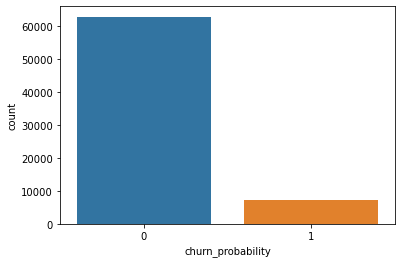

In [54]:
# Plotting churn_probability
sns.countplot(x='churn_probability', data=telcom)

In [55]:
# Convert Age on network to number of years from days
telcom['aon']=round(((telcom['aon']/30)/12),1)
sns.boxplot(y = 'aon', x='churn_probability',palette='Set2', data = telcom)

<AxesSubplot:xlabel='churn_probability', ylabel='aon'>

In [56]:
# Checking fb user
plt.subplots(figsize=(40,40))
# Subplot 1
plt.subplot(3,3,1)
sns.countplot(x='fb_user_6' ,data=telcom)
# Subplot 2
plt.subplot(3,3,2)
sns.countplot(x='fb_user_7', data=telcom)
# Subplot 3
plt.subplot(3,3,3)
sns.countplot(x='fb_user_8', data=telcom)

(<Figure size 2880x2880 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

<AxesSubplot:xlabel='fb_user_6', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='fb_user_7', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='fb_user_8', ylabel='count'>

In [57]:
# Plotting histogram for average recharge amount
sns.histplot(telcom['av_rech'],kde=True,stat='density')


<AxesSubplot:xlabel='av_rech', ylabel='Density'>

In [58]:
#plot to visualize loc_og_mou
telcom.groupby("churn_probability")['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'].mean().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Number of recharge done 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.show()

<AxesSubplot:xlabel='churn_probability'>

Text(0.5, 1.0, 'Number of recharge done 6,7,8')

Text(0, 0.5, 'median')

Text(0.5, 0, 'Churn type')

(<Figure size 2880x2880 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

<AxesSubplot:xlabel='churn_probability', ylabel='roam_og_mou_6'>

<AxesSubplot:>

<AxesSubplot:xlabel='churn_probability', ylabel='roam_og_mou_7'>

<AxesSubplot:>

<AxesSubplot:xlabel='churn_probability', ylabel='roam_og_mou_8'>

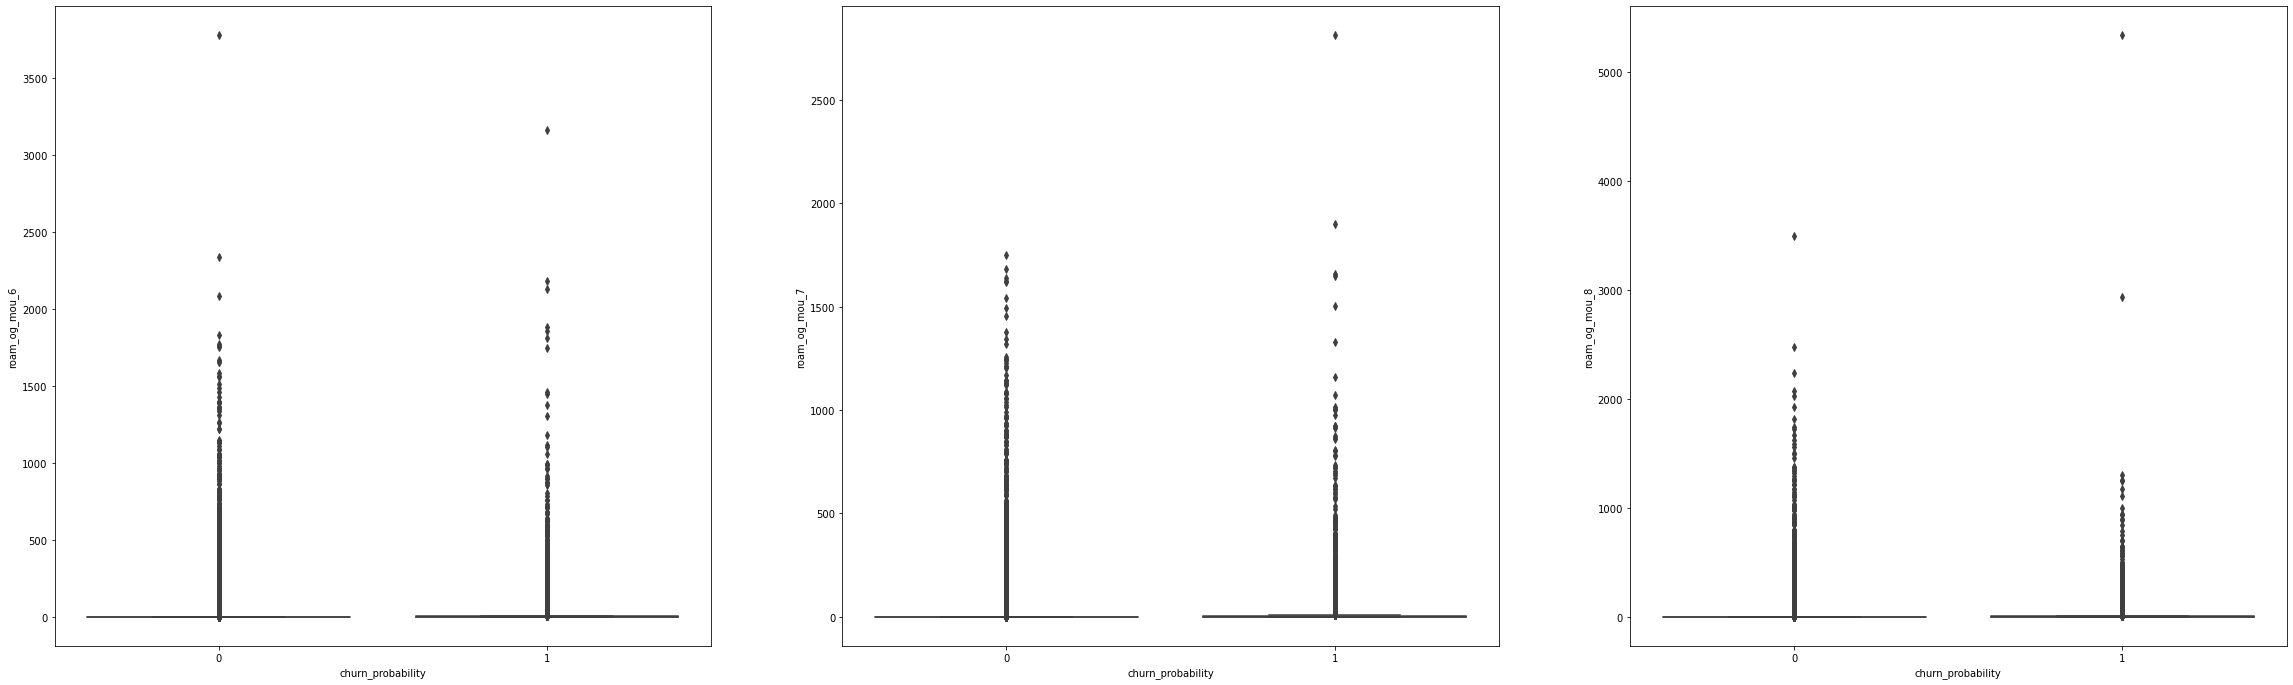

In [59]:

plt.subplots(figsize=(40,40))
plt.subplot(3,3,1)
sns.boxplot(x='churn_probability', y='roam_og_mou_6', data = telcom)
plt.subplot(3,3,2)
sns.boxplot(x='churn_probability', y='roam_og_mou_7', data = telcom)
plt.subplot(3,3,3)
sns.boxplot(x='churn_probability', y='roam_og_mou_8', data = telcom)

(<Figure size 2880x2880 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

<AxesSubplot:xlabel='days_last_rech_6', ylabel='churn_probability'>

Text(0.5, 0, 'Days of Last Recharge in June')

Text(0, 0.5, 'Churn Percentage')

<AxesSubplot:>

<AxesSubplot:xlabel='days_last_rech_7', ylabel='churn_probability'>

Text(0.5, 0, 'Days of Last Recharge in June')

Text(0, 0.5, 'Churn Percentage')

<AxesSubplot:>

<AxesSubplot:xlabel='days_last_rech_8', ylabel='churn_probability'>

Text(0.5, 0, 'Days of Last Recharge in June')

Text(0, 0.5, 'Churn Percentage')

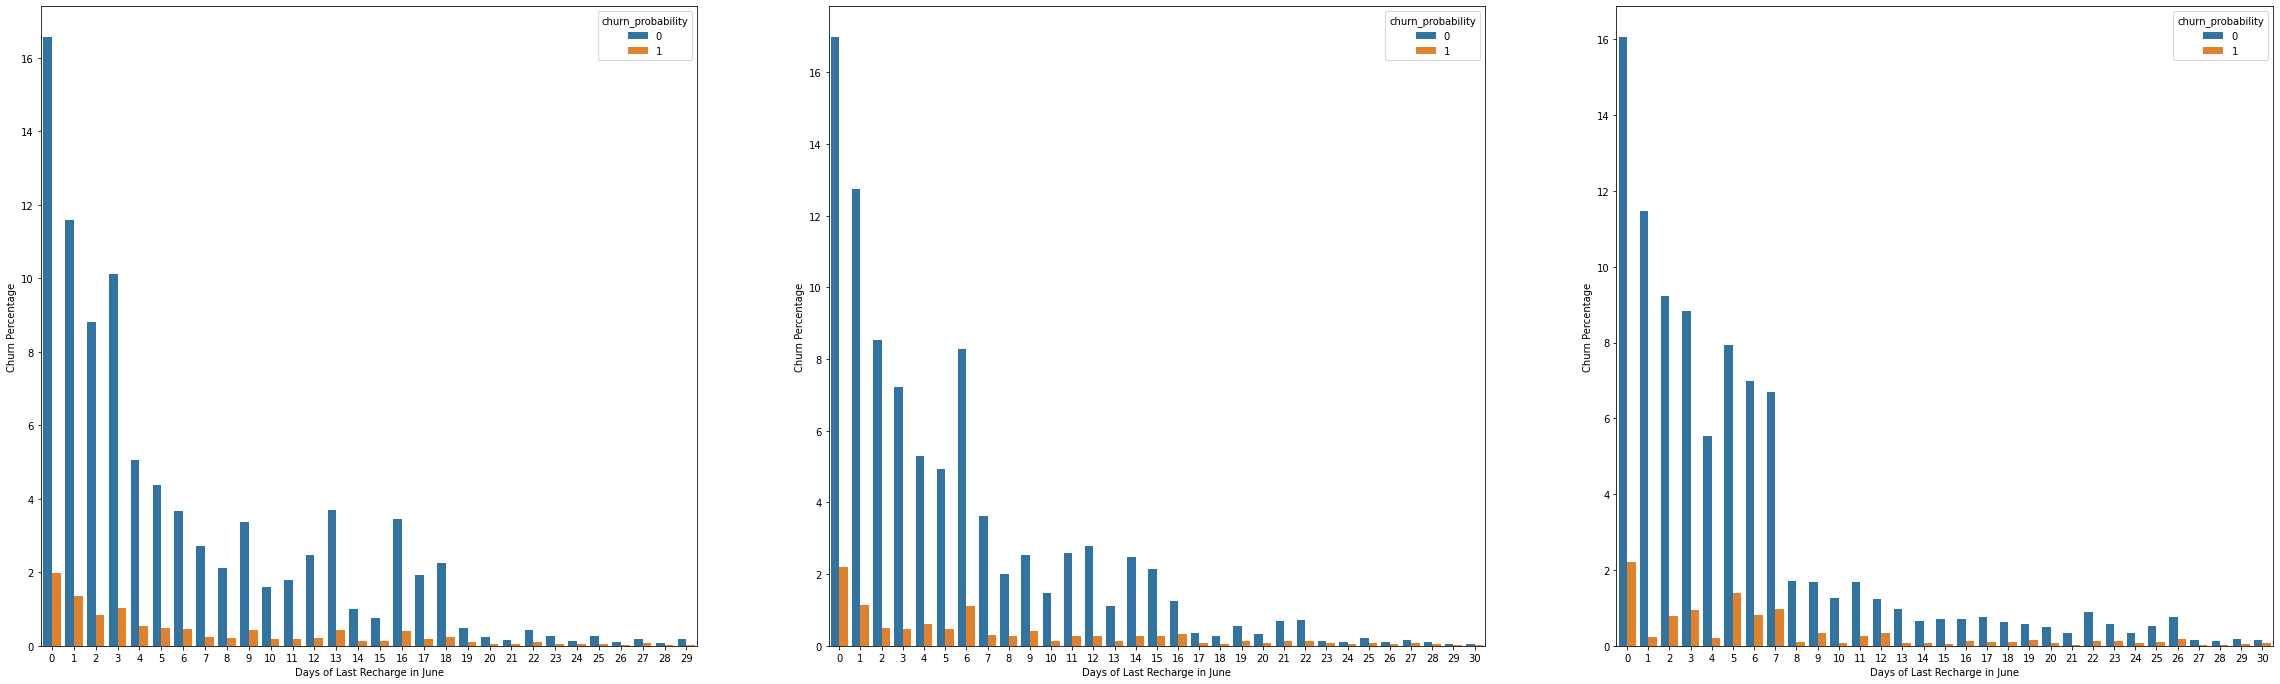

In [60]:
# Plotting against churn_probability with last recharge
plt.subplots(figsize=(40,40))
plt.subplot(3,3,1)
sns.barplot(x="days_last_rech_6", y="churn_probability", hue="churn_probability", data=telcom,estimator=lambda x: len(x) / len(telcom) * 100)
plt.xlabel('Days of Last Recharge in June')
plt.ylabel('Churn Percentage')
plt.subplot(3,3,2)
sns.barplot(x="days_last_rech_7", y="churn_probability", hue="churn_probability", data=telcom,estimator=lambda x: len(x) / len(telcom) * 100)
plt.xlabel('Days of Last Recharge in June')
plt.ylabel('Churn Percentage')
plt.subplot(3,3,3)
sns.barplot(x="days_last_rech_8", y="churn_probability", hue="churn_probability", data=telcom,estimator=lambda x: len(x) / len(telcom) * 100)
plt.xlabel('Days of Last Recharge in June')
plt.ylabel('Churn Percentage')

In [61]:
# Checking percentile values
telcom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

id        arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  ...  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8   vol_2g_mb_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   69999.000000   69999.000000   69999.000000   69999.000000   69999.000000   69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000  69999.000000  69999.000000  69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000           69999.0           69999.0           69999.0  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000  ...       69999.000000       69999.000000       69999.000000     69999.000000     69999.000000     69999.000000     69999.000000     69999.000000     69999.000000  69999.000000   
mean   34999.000000    283.134365    278.185912    278.858826    127.887939    128.754731    125.943607    191.010582    189.585401    186.146273       9.379276       6.745305       6.634328      13.625476       9.464386       9.254848         45.050076         44.394344         43.269280         89.551272         87.313796         86.301054          3.595161          3.632045          3.467948          1.081499          1.308807          1.345676    138.203540    135.347249    133.045174         77.431415         80.560009         79.055781         84.666274         88.024790         85.794878          1.081836          1.042449          1.001784               0.0               0.0               0.0    163.182149    169.629833    165.854932      0.812319      0.779964      0.797125      3.802082  ...           0.619309           0.683981           0.697867        31.748339        32.260075        32.986614         0.151159         0.159174         0.167445     51.773924   
std    20207.115084    334.213918    344.366927    351.924315    295.115497    306.326345    304.990552    312.900706    318.492632    318.453812      56.260778      54.892940      51.999899      72.055036      57.409013      62.923987        148.238746        151.998993        149.944829        159.846546        151.875981        150.286404         13.073900         13.324919         12.686917          5.631416          7.765132          6.374743    248.587898    243.048363    240.826272        250.496889        262.019256        260.533850        251.251454        262.935831        263.573506          7.977166          8.166510          7.494240               0.0               0.0               0.0    385.640962    402.795152    401.603767     29.153852     28.654177     28.771385     15.557032  ...           1.762010           1.943193           1.973434        77.519536        78.069163        78.808337         0.692042         0.758303         0.798173    212.513909   
min        0.000000  -2258.709000  -1289.715000   -945.808000

In [62]:
# Dropping the outliers using IQR method
num_col = ['total_rech_num_6','total_rech_num_7','total_rech_num_8']
def drop_outliers(x):
    
    for col in num_col:
        Q1 = x[col].quantile(.01)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

telecom = drop_outliers(telcom)

<AxesSubplot:xlabel='churn_probability'>

Text(0.5, 1.0, 'local outgoing  minute in  month 6,7,8')

Text(0, 0.5, 'median')

Text(0.5, 0, 'Churn type')

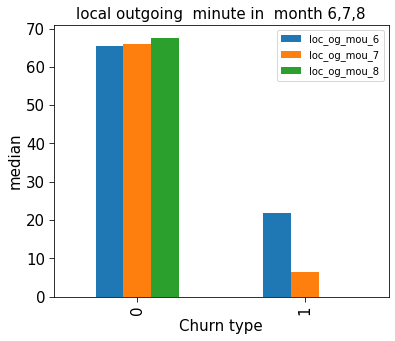

In [63]:
#plot to visualize loc_og_mou
telcom.groupby("churn_probability")["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("local outgoing  minute in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.show()

In [64]:
col=['fb_user_6','fb_user_7','fb_user_8']
telcom_dum = pd.get_dummies(telcom[col],drop_first=True)
# Merging  the dataframe, with the dummy variable dataset.
telcom_final = pd.concat([telcom,telcom_dum],axis=1)
telcom_final = telcom_final.drop(['fb_user_6','fb_user_7','fb_user_8'],axis=1)
telcom_final.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  ...  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29         32.24         96.68          2.33           0.00            0.0            0.0           0.00            0.0           0.00              2.23              0.00              0.28              5.29             16.04              2.33              0.00              0.00              0.00              0.00              0.00              0.00          7.53         16.04          2.61             46.34            124.38              1.01             18.75             80.61               0.0              0.00               0.0               0.0               0.0               0.0               0.0         65.09        204.99          1.01           0.0           0.0           0.0          8.20  ...              0.0              0.0              0.0          0.0         0.00         0.00          0.0         0.00          0.0        0.0       0.00        0.0        0.0       0.00        0.0               0.0   
1   1    0.000  122.787   42.953         0.00         0.00         0.00          0.00         25.99         30.89           0.00            0.0            0.0           0.00            0.0           0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00             22.01             29.79          0.00          0.00          0.00              0.00              0.00              0.00              0.00              0.00               0.0              0.00               0.0               0.0               0.0               0.0               0.0          0.00          0.00          0.00           0.0           0.0           0.0          0.00  ...              0.0              1.0              0.0          0.0       352.91         0.00          0.0         3.96          0.0        0.0     122.07        0.0        0.0     122.08        0.0               0.0   
2   2   60.806  103.176    0.000         0.53        15.93         0.00         53.99         82.05          0.00           0.00            0.0            0.0           0.00            0.0           0.00              0.53             12.98              0.00             24.11              0.00              0.00              0.00              0.00              0.00              2.14              0.00              0.00         24.64         12.98          0.00              0.00              2.94              0.00             28.94             82.05               0.0              0.00               0.0               0.0               0.0               0.0               0.0         28.94         84.99          0.00           0.0           0.0           0.0          2.89  ...              0.0              0.0              0.0          0.0         0.00         0.00          0.0         0.00          0.0        0.0       0.00        0.0        0.0       0.00        0.0               0.0   
3   3  156.362 

In [65]:
telcom_id=telcom_final['id']
y_telcom=telcom_final['churn_probability']

telcom_final=telcom_final.drop(['id','churn_probability'],axis=1)

In [66]:
# Scaling the numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric=telcom_final.columns
telcom_final[numeric] = scaler.fit_transform(telcom_final[numeric])



In [67]:
X_train = telcom_final
y_train = y_telcom

In [68]:
# Read the data from csv file
telcom_test=pd.read_csv('/home/sanat/Downloads/test.csv')
telcom_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  ...  date_of_last_rech_data_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
0  69999        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014   91.882   65.330   64.445        31.78        20.23        23.11         60.16         32.16         34.83           0.00           0.00           0.00           0.00           0.00           0.00             24.88             20.23             21.06             18.13             10.89              8.36              0.00             13.58              0.00               0.0              0.00              0.03         43.01         44.71         29.43              6.90              0.00              2.05             42.03              7.68             26.43               0.0               0.0               0.0               0.0               0.0               0.0  ...                       NaN                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN   
1  70000        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014  414.168  515.568  360.868        75.51        41.21        19.84        474.34        621.84        394.94           0.00           0.00           0.00           0.00           0.00           0.00             75.51             41.21             19.84            473.61            598.08            377.26              0.73              0.00              0.00               0.0              0.00              0.00        549.86        639.29        397.11              0.00              0.00              0.00              0.00             23.76             17.68               0.0               0.0               0.0               0.0               0.0               0.0  ...                       NaN                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN   
2  70001        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014  329.844  434.884  746.239         7.54         7.86         8.40         16.98         45.81         45.04          22.81         103.38          26.08          24.53          53.68          54.44              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.0              0.00              0.00          0.00          0.00          0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.0               0.0               0.0               0.0               0.0               0.0  ...                       NaN                NaN                NaN                NaN              NaN              NaN              NaN              NaN              NaN              NaN   
3  70002        109   

In [69]:
# Checking for duplicate rows
telcom_test.duplicated().value_counts()

False    30000
dtype: int64

No duplicates are present

In [70]:
# Checking for null values
null2=telcom_test.isnull().sum()*100/telcom_test.shape[0]
null2

id                 0.000000
circle_id          0.000000
loc_og_t2o_mou     1.053333
std_og_t2o_mou     1.053333
loc_ic_t2o_mou     1.053333
                    ...    
fb_user_8         73.593333
aon                0.000000
aug_vbc_3g         0.000000
jul_vbc_3g         0.000000
jun_vbc_3g         0.000000
Length: 171, dtype: float64

In [71]:
# Imputing null values for below column by 'NA'
for col in ('total_rech_data_6', 'total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8',
'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','av_rech_amt_data_6',
'av_rech_amt_data_7','av_rech_amt_data_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6',
'offnet_mou_7', 'offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7',
'loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6',
'loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6',
'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7',
'std_og_t2c_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7',
'spl_og_mou_8','og_others_6','og_others_7','og_others_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6',
'loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'):
    telcom_test[col]=telcom_test[col].fillna('0').astype('float64')

In [72]:
for col in ('date_of_last_rech_6','date_of_last_rech_data_6'):
    telcom_test[col]=telcom_test[col].fillna('06/30/2014')
for col in ('date_of_last_rech_7','date_of_last_rech_data_7'):
    telcom_test[col]=telcom_test[col].fillna('07/31/2014')
for col in ('date_of_last_rech_8','date_of_last_rech_data_8'):
    telcom_test[col]=telcom_test[col].fillna('08/31/2014')
for col in ('fb_user_6','fb_user_7','fb_user_8'):
    telcom_test[col]=telcom_test[col].fillna('-1')

In [73]:
telcom_test['last_date_of_month_7']=telcom_test['last_date_of_month_7'].fillna('7/31/2014')
telcom_test['last_date_of_month_8']=telcom_test['last_date_of_month_8'].fillna('8/31/2014')

In [74]:
# Dropping below columns 
telcom_test = telcom_test.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis='columns')

In [75]:
null2=telcom_test.isnull().sum()*100/telcom_test.shape[0]
null3=null2[null!=0]
null3

Series([], dtype: float64)

In [76]:
# Total Amount Data
telcom_test['avg_rech_data_amt']=((telcom_test['count_rech_2g_6']+telcom_test['count_rech_3g_6'])*telcom_test['av_rech_amt_data_6'] + (telcom_test['count_rech_2g_7']+telcom_test['count_rech_3g_7'])*telcom_test['av_rech_amt_data_7']+(telcom_test['count_rech_2g_8']+telcom_test['count_rech_3g_8'])*telcom_test['av_rech_amt_data_8'])/3

In [77]:
telcom_test['avg_rech_amt']=(telcom_test['total_rech_amt_6']+telcom_test['total_rech_amt_7']+telcom_test['total_rech_amt_8'])/3

telcom_test['av_rech']=telcom_test['avg_rech_data_amt']+telcom_test['avg_rech_amt']


In [78]:
telcom_test = telcom_test.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],axis=1)

In [79]:
col_dates=[]
for col in list(telcom_test.columns):
    if ('date' in col):
        col_dates.append(col)

In [80]:
telcom_test[col_dates] = telcom_test[col_dates].apply(pd.to_datetime)
telcom_test['days_last_rech_6']= telcom_test['last_date_of_month_6']-telcom_test['date_of_last_rech_6']
telcom_test['days_last_rech_7']= telcom_test['last_date_of_month_7']-telcom_test['date_of_last_rech_7']
telcom_test['days_last_rech_8']= telcom_test['last_date_of_month_8']-telcom_test['date_of_last_rech_8']
telcom_test['days_last_rech_data_6']= telcom_test['last_date_of_month_6']-telcom_test['date_of_last_rech_data_6']
telcom_test['days_last_rech_data_7']= telcom_test['last_date_of_month_7']-telcom_test['date_of_last_rech_data_7']
telcom_test['days_last_rech_data_8']= telcom_test['last_date_of_month_8']-telcom_test['date_of_last_rech_data_8']

In [81]:
for col in ('days_last_rech_6','days_last_rech_7','days_last_rech_8','days_last_rech_data_6','days_last_rech_data_7','days_last_rech_data_8'):
    telcom_test[col]=telcom_test[col].astype(str)

In [82]:
for col in ('days_last_rech_6','days_last_rech_7','days_last_rech_8','days_last_rech_data_6','days_last_rech_data_7','days_last_rech_data_8'):
    telcom_test[col]=telcom_test[col].apply(lambda x:x.replace(' days','')).astype(int)

In [83]:
# Dropping below columns 
telcom_test = telcom_test.drop(col_dates,axis='columns')
telcom_test.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  ...  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  \
0  69999   91.882   65.330   64.445        31.78        20.23        23.11         60.16         32.16         34.83           0.00           0.00           0.00           0.00           0.00           0.00             24.88             20.23             21.06             18.13             10.89              8.36              0.00             13.58              0.00               0.0              0.00              0.03         43.01         44.71         29.43              6.90              0.00              2.05             42.03              7.68             26.43               0.0               0.0               0.0               0.0               0.0               0.0         48.93          7.68         28.48           0.0           0.0           0.0          0.00  ...                0.0              0.0              0.0              0.0              0.0              0.0              0.0          0.0          0.0          0.0          0.0          0.0          0.0        0.0   
1  70000  414.168  515.568  360.868        75.51        41.21        19.84        474.34        621.84        394.94           0.00           0.00           0.00           0.00           0.00           0.00             75.51             41.21             19.84            473.61            598.08            377.26              0.73              0.00              0.00               0.0              0.00              0.00        549.86        639.29        397.11              0.00              0.00              0.00              0.00             23.76             17.68               0.0               0.0               0.0               0.0               0.0               0.0          0.00         23.76         17.68           0.0           0.0           0.8          0.00  ...                0.0              0.0              0.0              0.0              0.0              0.0              0.0          0.0          0.0          0.0          0.0          0.0          0.0        0.0   
2  70001  329.844  434.884  746.239         7.54         7.86         8.40         16.98         45.81         45.04          22.81         103.38          26.08          24.53          53.68          54.44              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.0              0.00              0.00          0.00          0.00          0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.0               0.0               0.0               0.0               0.0               0.0          0.00          0.00          0.00           0.0           0.0           0.0          0.00  ...                0.0              0.0              0.0              0.0              0.0              0.0              0.0          0.0          0.0          0.0          0.0          0.0          0.0        0.0   
3  70002   43.550 

In [84]:
# Checking percentile values
telcom_test.describe(percentiles=[.25, .5, .75, .90, .95, .99])

id        arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  ...  last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   30000.000000   30000.000000   30000.000000   30000.000000   30000.000000   30000.000000      30000.000000      30000.000000      30000.000000      30000.000000      30000.000000      30000.000000      30000.000000      30000.000000      30000.000000      30000.000000      30000.000000      30000.000000  30000.000000  30000.000000  30000.000000      30000.000000      30000.000000      30000.000000      30000.000000      30000.000000      30000.000000      30000.000000      30000.000000      30000.000000           30000.0           30000.0           30000.0  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  ...        30000.000000       30000.000000       30000.000000       30000.000000     30000.000000     30000.000000     30000.000000     30000.000000     30000.000000     30000.000000   
mean   84998.500000    282.644348    279.355021    279.845167    125.539490    127.946958    125.679297    188.117924    189.104353    185.668382       9.975940       7.174221       7.522428      12.752706       9.382512       9.857337         45.704440         45.345183         43.771460         89.937606         89.168060         88.032484          3.622405          3.680604          3.508741          1.072640          1.331749          1.382451    139.271455    138.200916    135.319580         74.949845         78.976776         78.215474         81.987399         85.608749         83.168088          1.090919          1.140889          1.030389               0.0               0.0               0.0    158.030728    165.729003    162.416478      0.660754      0.668764      0.635689      3.670491  ...           62.996933           0.620700           0.676833           0.700033        31.894033        32.747533        33.407933         0.149633         0.158533         0.167433   
std     8660.398374    314.560212    323.205370    326.437029    286.076687    298.064169    294.988494    312.988297    329.261711    327.934516      98.026703     101.309296      91.961216      65.218464      57.206077      63.140072        147.912033        153.845460        141.379961        162.258896        163.397849        161.284882         15.855366         15.479543         13.498976          4.608332          6.435441          7.117491    247.744485    250.814940    242.482473        241.874555        251.786505        255.154742        250.773719        268.696364        268.705031          7.472985          9.028935          8.141813               0.0               0.0               0.0    378.754619    401.379603    404.031081     11.940656     13.601659     11.255196     12.312292  ...          109.904928           1.757138           1.879782           1.939874        76.614487        78.976636        79.023333         0.685219         0.749057         0.743114   
min    69999.000000   -185.043000  -2

In [85]:
col=['fb_user_6','fb_user_7','fb_user_8']
telcom_test_dum = pd.get_dummies(telcom_test[col],drop_first=True)


# Merging  the dataframe, with the dummy variable dataset.
telcom_test_final = pd.concat([telcom_test,telcom_test_dum],axis=1)

telcom_test_final = telcom_test_final.drop(['fb_user_6','fb_user_7','fb_user_8'],axis=1)

telcom_test_final.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  ...  max_rech_data_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  \
0  69999   91.882   65.330   64.445        31.78        20.23        23.11         60.16         32.16         34.83           0.00           0.00           0.00           0.00           0.00           0.00             24.88             20.23             21.06             18.13             10.89              8.36              0.00             13.58              0.00               0.0              0.00              0.03         43.01         44.71         29.43              6.90              0.00              2.05             42.03              7.68             26.43               0.0               0.0               0.0               0.0               0.0               0.0         48.93          7.68         28.48           0.0           0.0           0.0          0.00  ...              0.0              0.0              0.0              0.0          0.0          0.0          0.0          0.0          0.0          0.0        0.0        0.0        0.0        0.0        0.0        0.0   
1  70000  414.168  515.568  360.868        75.51        41.21        19.84        474.34        621.84        394.94           0.00           0.00           0.00           0.00           0.00           0.00             75.51             41.21             19.84            473.61            598.08            377.26              0.73              0.00              0.00               0.0              0.00              0.00        549.86        639.29        397.11              0.00              0.00              0.00              0.00             23.76             17.68               0.0               0.0               0.0               0.0               0.0               0.0          0.00         23.76         17.68           0.0           0.0           0.8          0.00  ...              0.0              0.0              0.0              0.0          0.0          0.0          0.0          0.0          0.0          0.0        0.0        0.0        0.0        0.0        0.0        0.0   
2  70001  329.844  434.884  746.239         7.54         7.86         8.40         16.98         45.81         45.04          22.81         103.38          26.08          24.53          53.68          54.44              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.0              0.00              0.00          0.00          0.00          0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.0               0.0               0.0               0.0               0.0               0.0          0.00          0.00          0.00           0.0           0.0           0.0          0.00  ...              0.0              0.0              0.0              0.0          0.0          0.0          0.0          0.0          0.0          0.0        0.0        0.0        0.0        0.0        0.0        0.0   
3  70002  

In [86]:
telcom_test_id=telcom_test_final['id']
telcom_test_final=telcom_test_final.drop('id',axis=1)

In [87]:
# Scaling the numerical data
scaler = StandardScaler()
numeric=telcom_test_final.columns
telcom_test_final[numeric] = scaler.fit_transform(telcom_test_final[numeric])

In [88]:
# verifying the values after appying scaling.
telcom_test_final.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  ...  max_rech_data_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8     arpu_3g_6     arpu_3g_7  \
count  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04   3.000000e+04   3.000000e+04   3.000000e+04   3.000000e+04   3.000000e+04   3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04      3.000000e+04           30000.0           30000.0           30000.0  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  ...     3.000000e+04     3.000000e+04     3.000000e+04     3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04   
mean  -1.684731e-16 -9.390636e-19  2.223407e-17 -2.441695e-16  8.555379e-17 -9.393782e-17  7.153722e-17  1.989677e-16  2.255233e-17   5.976553e-16  -2.876036e-15   8.449759e-16  -2.730172e-15   1.364427e-15   2.278252e-15      6.728118e-16      3.717471e-16      4.537546e-16      5.579611e-17     -2.324622e-17      1.547743e-16     -1.326180e-16     -1.732299e-16     -2.492599e-16      1.560962e-15      5.604175e-16     -6.362910e-16 -2.589558e-16 -2.228754e-16 -1.971775e-16     -8.685645e-17      1.572224e-16      7.443231e-16      1.823856e-16      5.743609e-16     -2.179978e-16     -4.571158e-16     -5.870304e-18     -9.874305e-16               0.0               0.0               0.0 -2.615334e-16 -8.018486e-16 -2.717988e-17 -4.708821e-16 -6.821627e-17  8.155268e-16  8.485287e-16  9.297045e-16  ...     8.753738e-16     2.150635e-15     8.526513e-16     3.671137e-17 -4.211002e-16  7.260711e-16 -1.771213e-16  1.274629e-17 -2.811381e-16  1.037866e-15 -1.731831e-15  1.351393e-15   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   1.000017e+00   1.000017e+00   1.000017e+00   1.000017e+00   1.000017e+00   1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00      1.000017e+00               0.0               0.0               0.0  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  ...     1.000017e+00     1.000017e+00     1.000017e+00     1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -1.486822e+00 -7.095916

In [91]:
telcom_test_final.to_excel("/home/sanat/Churn_output.xlsx")

In [90]:
# Copy to X_test
X_test=telcom_test_final

## Logistic Regression without PCA

In [94]:
# Building model using Logistic Regressiom
lr = LogisticRegression(class_weight='balanced', random_state=42)
rfe = RFE(lr, step=15)   
rfe = rfe.fit(X_train, y_train)

In [95]:
# Finding the important features
rfe_features = list(X_train.columns[rfe.support_])
print("15 most important features selected by RFE ", rfe_features)

15 most important features selected by RFE  ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8', 'max_rech_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6', 

In [96]:
# Building model using these important features
X_rfe=X_train[rfe_features]
lr_rfe = LogisticRegression(class_weight='balanced', random_state=42)
lr_rfe.fit(X_rfe, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [97]:
y_pred = lr_rfe.predict(X_rfe)

In [98]:
cv_score = cross_val_score(lr_rfe, X_rfe,y_train, cv=5,scoring="f1")
print(f"Cross validation score: {cv_score}")
print('Mean f1_score : ',round(np.mean(cv_score),2))

Cross validation score: [0.45690936 0.46614583 0.46085011 0.45541159 0.46013752]
Mean f1_score :  0.46


In [99]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     62867
           1       0.31      0.87      0.46      7132

    accuracy                           0.79     69999
   macro avg       0.65      0.83      0.67     69999
weighted avg       0.91      0.79      0.83     69999



In [100]:
from sklearn.metrics import roc_curve, auc
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(9,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [101]:
# Plotting ROC curve using user defined function
draw_roc(y_train, y_pred)

In [102]:
pca = PCA(random_state=100)
pca.fit(X_train)

PCA(random_state=100)

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

Text(0.13811840311440868, 0.10854790854348506, 'arpu_6')

Text(0.14689723475497585, 0.11619329840428455, 'arpu_7')

Text(0.13996318194493218, 0.10726159170996852, 'arpu_8')

Text(0.05495738830137348, 0.13095584743090394, 'onnet_mou_6')

Text(0.06004328785830866, 0.14184561372036825, 'onnet_mou_7')

Text(0.05747136315865031, 0.1341924712388534, 'onnet_mou_8')

Text(0.08143038415959365, 0.15045872930627252, 'offnet_mou_6')

Text(0.08544510471780276, 0.16104368662612675, 'offnet_mou_7')

Text(0.08090546351852412, 0.14882048343732637, 'offnet_mou_8')

Text(0.015386798964277673, 0.016383155940343085, 'roam_ic_mou_6')

Text(0.013894352181813336, 0.008908693836816558, 'roam_ic_mou_7')

Text(0.017115044736121188, 0.011470799997468287, 'roam_ic_mou_8')

Text(0.020147007051073265, 0.02945641597596875, 'roam_og_mou_6')

Text(0.02060587302390584, 0.023284940269660548, 'roam_og_mou_7')

Text(0.02199158115668399, 0.02457027965032658, 'roam_og_mou_8')

Text(0.06049887940298529, 0.08457501281335661, 'loc_og_t2t_mou_6')

Text(0.06354937037247126, 0.08963678337666299, 'loc_og_t2t_mou_7')

Text(0.06267607392338023, 0.08758946559172119, 'loc_og_t2t_mou_8')

Text(0.0870270528640918, 0.10728653793173387, 'loc_og_t2m_mou_6')

Text(0.09258365412072525, 0.11657282799861376, 'loc_og_t2m_mou_7')

Text(0.09074384000945117, 0.11031033046109483, 'loc_og_t2m_mou_8')

Text(0.04502981371515139, 0.0399626451128732, 'loc_og_t2f_mou_6')

Text(0.04667301911549328, 0.04156426065887394, 'loc_og_t2f_mou_7')

Text(0.04575101421116382, 0.0401730543012686, 'loc_og_t2f_mou_8')

Text(0.016026814766568562, 0.013005329203241512, 'loc_og_t2c_mou_6')

Text(0.012493445092940758, 0.014101810265315097, 'loc_og_t2c_mou_7')

Text(0.014337973186929094, 0.015045747351051292, 'loc_og_t2c_mou_8')

Text(0.09440603805415917, 0.12152413988444749, 'loc_og_mou_6')

Text(0.10015634243459312, 0.1311816785344406, 'loc_og_mou_7')

Text(0.0980632724895847, 0.1254917800246354, 'loc_og_mou_8')

Text(0.026943565475054127, 0.10077541762668607, 'std_og_t2t_mou_6')

Text(0.03163924114793041, 0.11161261793230862, 'std_og_t2t_mou_7')

Text(0.02928042780628027, 0.10415171954666781, 'std_og_t2t_mou_8')

Text(0.03548785788495807, 0.10755635842456383, 'std_og_t2m_mou_6')

Text(0.04031750264615726, 0.11803242733458352, 'std_og_t2m_mou_7')

Text(0.0361792540064867, 0.10725945564887208, 'std_og_t2m_mou_8')

Text(0.016120139776038992, 0.01977673024825673, 'std_og_t2f_mou_6')

Text(0.01719376303795652, 0.020628681514419295, 'std_og_t2f_mou_7')

Text(0.01671349871567646, 0.01894172693821968, 'std_og_t2f_mou_8')

Text(0.0, 0.0, 'std_og_t2c_mou_6')

Text(0.0, 0.0, 'std_og_t2c_mou_7')

Text(0.0, 0.0, 'std_og_t2c_mou_8')

Text(0.04095611444896544, 0.1359442747242504, 'std_og_mou_6')

Text(0.04724867258645279, 0.1500723304821384, 'std_og_mou_7')

Text(0.04305187083202217, 0.138315573580133, 'std_og_mou_8')

Text(0.024591980872374727, 0.024708688998920085, 'isd_og_mou_6')

Text(0.02648768467985322, 0.025909047895668332, 'isd_og_mou_7')

Text(0.025738084018962805, 0.025442298130643155, 'isd_og_mou_8')

Text(0.02319500167842849, 0.023461989630706524, 'spl_og_mou_6')

Text(0.01908504311395898, 0.027019207305515935, 'spl_og_mou_7')

Text(0.02374060487430442, 0.029941385899213222, 'spl_og_mou_8')

Text(0.005285548167456214, 0.012053302493819924, 'og_others_6')

Text(0.002958736173974633, 0.0009844061429904055, 'og_others_7')

Text(0.002763841827790641, 0.0026106230762758535, 'og_others_8')

Text(0.08671327185320546, 0.17997148701622556, 'total_og_mou_6')

Text(0.0929910463890233, 0.1954910055570678, 'total_og_mou_7')

Text(0.08800897983685803, 0.1820847155404046, 'total_og_mou_8')

Text(0.04364871171583051, 0.05366054122347791, 'loc_ic_t2t_mou_6')

Text(0.04634955172696612, 0.05761401398003704, 'loc_ic_t2t_mou_7')

Text(0.0476441725322743, 0.056881918789476106, 'loc_ic_t2t_mou_8')

Text(0.070990783788151, 0.07631583866937311, 'loc_ic_t2m_mou_6')

Text(0.07663255405179321, 0.08370442034565775, 'loc_ic_t2m_mou_7')

Text(0.0742010081971728, 0.07968871998447682, 'loc_ic_t2m_mou_8')

Text(0.034690016106727596, 0.027714004699868348, 'loc_ic_t2f_mou_6')

Text(0.03523082124487457, 0.02928348251448493, 'loc_ic_t2f_mou_7')

Text(0.03636128692642846, 0.028908139918547578, 'loc_ic_t2f_mou_8')

Text(0.07682242489104496, 0.08482452936777331, 'loc_ic_mou_6')

Text(0.08247121607582919, 0.09255000928300665, 'loc_ic_mou_7')

Text(0.08178239463614058, 0.0894838173044322, 'loc_ic_mou_8')

Text(0.02272376525454646, 0.03519645527065024, 'std_ic_t2t_mou_6')

Text(0.024267050435271963, 0.036924476845733516, 'std_ic_t2t_mou_7')

Text(0.024361739095527465, 0.03476770227900714, 'std_ic_t2t_mou_8')

Text(0.02776949468281674, 0.043529092328291365, 'std_ic_t2m_mou_6')

Text(0.029658489433396808, 0.046692385112641545, 'std_ic_t2m_mou_7')

Text(0.02987915350227726, 0.04657020324694056, 'std_ic_t2m_mou_8')

Text(0.016281157743457928, 0.016680487209316166, 'std_ic_t2f_mou_6')

Text(0.017958959012169932, 0.016778515273956903, 'std_ic_t2f_mou_7')

Text(0.015656100267104234, 0.014688124376273492, 'std_ic_t2f_mou_8')

Text(0.0, 0.0, 'std_ic_t2o_mou_6')

Text(0.0, 0.0, 'std_ic_t2o_mou_7')

Text(0.0, 0.0, 'std_ic_t2o_mou_8')

Text(0.03515717812084155, 0.053502981560950985, 'std_ic_mou_6')

Text(0.03714125724955313, 0.056217397876767015, 'std_ic_mou_7')

Text(0.03689570112127165, 0.05448896628514322, 'std_ic_mou_8')

Text(0.08229652626992566, 0.09491316819578821, 'total_ic_mou_6')

Text(0.08799725156443783, 0.1035917551834371, 'total_ic_mou_7')

Text(0.08718507732132127, 0.09970537295084025, 'total_ic_mou_8')

Text(-0.0004815828293904038, 0.013933871397109205, 'spl_ic_mou_6')

Text(-0.014338177486818338, -0.009787391602375874, 'spl_ic_mou_7')

Text(-0.013816369422842657, 0.0011644060823189446, 'spl_ic_mou_8')

Text(0.016632233881588146, 0.012793349497317898, 'isd_ic_mou_6')

Text(0.01693462492470598, 0.01603849484332203, 'isd_ic_mou_7')

Text(0.017374342133125865, 0.014545571767733669, 'isd_ic_mou_8')

Text(0.008236611772620807, 0.008996901449122713, 'ic_others_6')

Text(0.009981915911954103, 0.010484909690326482, 'ic_others_7')

Text(0.008203913646126975, 0.010782299531567374, 'ic_others_8')

Text(0.07200017737353039, 0.07678230406420299, 'total_rech_num_6')

Text(0.07377753609680651, 0.07843513245901372, 'total_rech_num_7')

Text(0.06294972378155486, 0.0703444018835306, 'total_rech_num_8')

Text(0.10369996851452822, 0.025633636756470655, 'max_rech_amt_6')

Text(0.11108326918501586, 0.028381622262046026, 'max_rech_amt_7')

Text(0.1084963459499524, 0.03058891419360466, 'max_rech_amt_8')

Text(0.07780839504771396, 0.030931228762004742, 'last_day_rch_amt_6')

Text(0.08114391601026388, 0.04137298552482501, 'last_day_rch_amt_7')

Text(0.0740537079408376, 0.033229907522495994, 'last_day_rch_amt_8')

Text(0.10165621957855131, -0.09410266943922654, 'total_rech_data_6')

Text(0.10655166739786308, -0.09241483848306989, 'total_rech_data_7')

Text(0.10353322571034787, -0.08562098028963348, 'total_rech_data_8')

Text(0.14172212705647705, -0.10415779490249033, 'max_rech_data_6')

Text(0.14648985214167679, -0.10584754553781041, 'max_rech_data_7')

Text(0.14405459075070998, -0.10307463937561041, 'max_rech_data_8')

Text(0.11796965992287851, -0.09087858591542725, 'count_rech_3g_6')

Text(0.1232747511412398, -0.09154531314406669, 'count_rech_3g_7')

Text(0.11723390947290889, -0.08801775589945507, 'count_rech_3g_8')

Text(0.05763744499773081, -0.05827573264864834, 'vol_2g_mb_6')

Text(0.057783756010643166, -0.05629558845018605, 'vol_2g_mb_7')

Text(0.0543897397379637, -0.05305872147503648, 'vol_2g_mb_8')

Text(0.13023159067071954, -0.09769898301324367, 'vol_3g_mb_6')

Text(0.14271742688773217, -0.10388986601087635, 'vol_3g_mb_7')

Text(0.14137233673108068, -0.10062552075804614, 'vol_3g_mb_8')

Text(0.13746920403583096, -0.09078506983422041, 'arpu_3g_6')

Text(0.14409252510866086, -0.09219714509707906, 'arpu_3g_7')

Text(0.1411575882615333, -0.08852427616483373, 'arpu_3g_8')

Text(0.1393908956158367, -0.0959766513044474, 'arpu_2g_6')

Text(0.14394323013216329, -0.09546674022178413, 'arpu_2g_7')

Text(0.14182064996676394, -0.09276476892886215, 'arpu_2g_8')

Text(0.026937909902241902, -0.02232725551250419, 'night_pck_user_6')

Text(0.028621366130590686, -0.021831725589733685, 'night_pck_user_7')

Text(0.030121296965857792, -0.01717335025383533, 'night_pck_user_8')

Text(0.057435942437938516, -0.04714551492205669, 'monthly_2g_6')

Text(0.059672939984841675, -0.04844209115567292, 'monthly_2g_7')

Text(0.0563131099859308, -0.047145427813804944, 'monthly_2g_8')

Text(0.053909492060128655, -0.059579063305874584, 'sachet_2g_6')

Text(0.05777208413639445, -0.05778003345881546, 'sachet_2g_7')

Text(0.05751545058277832, -0.0518273032483865, 'sachet_2g_8')

Text(0.12067870922796926, -0.08160788430597421, 'monthly_3g_6')

Text(0.12421181224671869, -0.0807945054649482, 'monthly_3g_7')

Text(0.12268661198299606, -0.07912918187580441, 'monthly_3g_8')

Text(0.06688920724465092, -0.05864241839681291, 'sachet_3g_6')

Text(0.07230829073388549, -0.06060940546086105, 'sachet_3g_7')

Text(0.06871507754856221, -0.05887967232869614, 'sachet_3g_8')

Text(0.010125872049202672, 0.018195445832239896, 'aon')

Text(0.11598688607936587, -0.07554422859857532, 'aug_vbc_3g')

Text(0.11894256244363867, -0.07924009982312262, 'jul_vbc_3g')

Text(0.11287154861575831, -0.07631187607908684, 'jun_vbc_3g')

Text(0.13127250191513645, -0.10371057305789516, 'avg_rech_data_amt')

Text(0.15534764472684615, 0.12314102042426726, 'avg_rech_amt')

Text(0.17474818085687044, -0.0321495145621124, 'av_rech')

Text(-0.042464237788933684, -0.059008023047774555, 'days_last_rech_6')

Text(-0.038006364895265154, -0.052524673040214485, 'days_last_rech_7')

Text(-0.024225178807428575, -0.03606517201672228, 'days_last_rech_8')

Text(0.08710151363229997, -0.07222314934481289, 'days_last_rech_data_6')

Text(0.08721229605797015, -0.06769034716363131, 'days_last_rech_data_7')

Text(0.08911960168138022, -0.06084907078489614, 'days_last_rech_data_8')

Text(0.12934539772651496, -0.11267121814083537, 'fb_user_6_1.0')

Text(-0.1293868769638819, 0.10217232099158649, 'fb_user_6_-1')

Text(0.13342891426911305, -0.11273214489318738, 'fb_user_7_1.0')

Text(-0.1334305958520616, 0.10128900894285317, 'fb_user_7_-1')

Text(0.13131144494742886, -0.10803533638121092, 'fb_user_8_1.0')

Text(-0.13204594879361792, 0.08987121451507067, 'fb_user_8_-1')

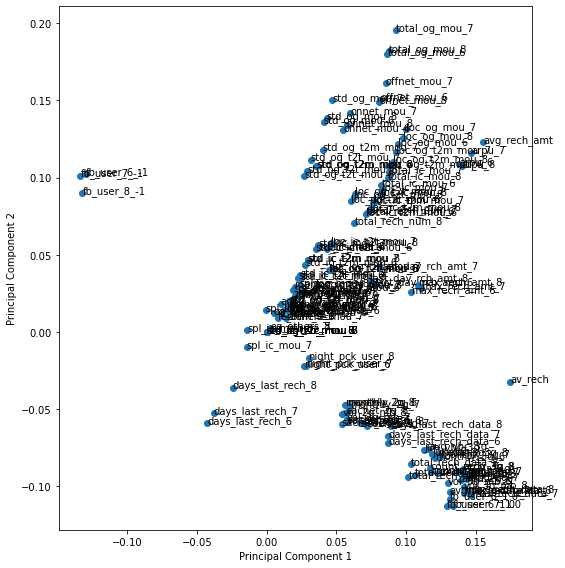

In [104]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pca.components_[0],pca.components_[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(telcom_final.columns):
    plt.annotate(txt, (pca.components_[0][i],pca.components_[1][i]))
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Cumulative variance explained')

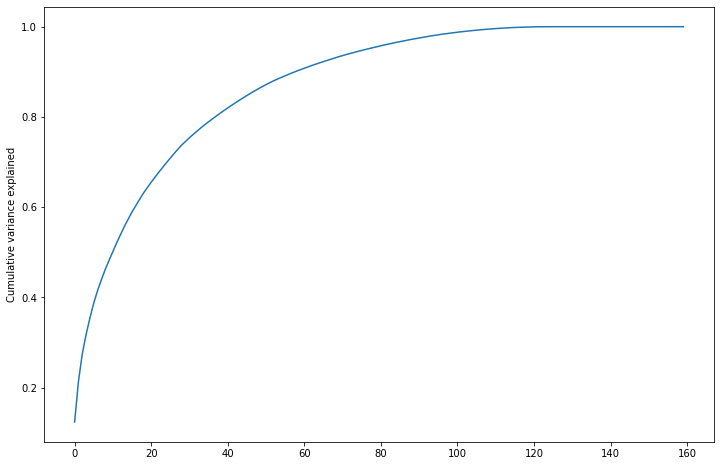

In [105]:
fig = plt.figure(figsize=[12,8])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Cumulative variance explained")
plt.show()

In [106]:
# By providing variance value we can also get the suitable principal components.
pca_demo = PCA(0.95,random_state=40)
X_train_pca1 = pca_demo.fit_transform(X_train)
print(f"suitable principal components for 95% of variance:{X_train_pca1.shape[1]}")

suitable principal components for 95% of variance:78


In [114]:
from sklearn.decomposition import IncrementalPCA

In [115]:
pca_final = IncrementalPCA(n_components=78)

In [116]:
X_train_pca = pca_final.fit_transform(X_train)

In [117]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [118]:
corrmat.shape

(78, 78)

In [119]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>